In [1]:
import numpy as np 
import pickle 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import os
np.set_printoptions(suppress=True)

In [2]:
# collect[-1]['Observation'] = sstgcnn_['obs'][key]
# collect[-1]['GroundTruth'] = sstgcnn_['tarj'][key]
# collect[-1]['S-GAN'] = sgan_['pred'][key]
# collect[-1]['S-STGCNN'] = sstgcnn_['pred'][key]
# collect[-1]['S-Implicit'] = simplicit_['pred'][key]
# collect[-1]['Trajectron++'] = trajpp_['pred'][key]
# collect[-1]['ExpertTraj'] = expertraj_['pred'][key]
dset = 'eth' # change dest to 'eth', 'zara1', 'hotel' 
with open('./aligned/vis_'+dset+'.pkl', 'rb') as f:
    data = pickle.load(f)
output_dir= './' + dset + 'Vis'
if not os.path.exists(output_dir):
  # Create a new directory because it does not exist 
  os.makedirs(output_dir)

In [4]:
def obtain_limits(model_data, normal_xy_ratio=True):
    x_min = y_min = np.inf
    x_max = y_max = -np.inf
    for trajs in model_data.values():
        sub_x_min = trajs[..., 0, :].min()
        sub_x_max = trajs[..., 0, :].max()
        sub_y_min = trajs[..., 1, :].min()
        sub_y_max = trajs[..., 1, :].max()
        x_min = min(x_min, sub_x_min)
        x_max = max(x_max, sub_x_max)
        y_min = min(y_min, sub_y_min)
        y_max = max(y_max, sub_y_max)
    x_len = x_max - x_min
    y_len = y_max - y_min
    
    if normal_xy_ratio:
        if x_len/y_len > 3.5/4.5:  # the x/y ratio of plot region in the figure is about 3.5/4.5. 
            # y_len is too small
            y_center = (y_max + y_min) / 2
            y_len = x_len / 3.5 * 4.5
            y_min = y_center - y_len / 2
            y_max = y_center + y_len / 2
        else:
            # x_len is too small
            x_center = (x_max + x_min) / 2
            x_len = y_len / 4.5 * 3.5
            x_min = x_center - x_len / 2
            x_max = x_center + x_len / 2
        
    return [x_min, x_max], [y_min, y_max]

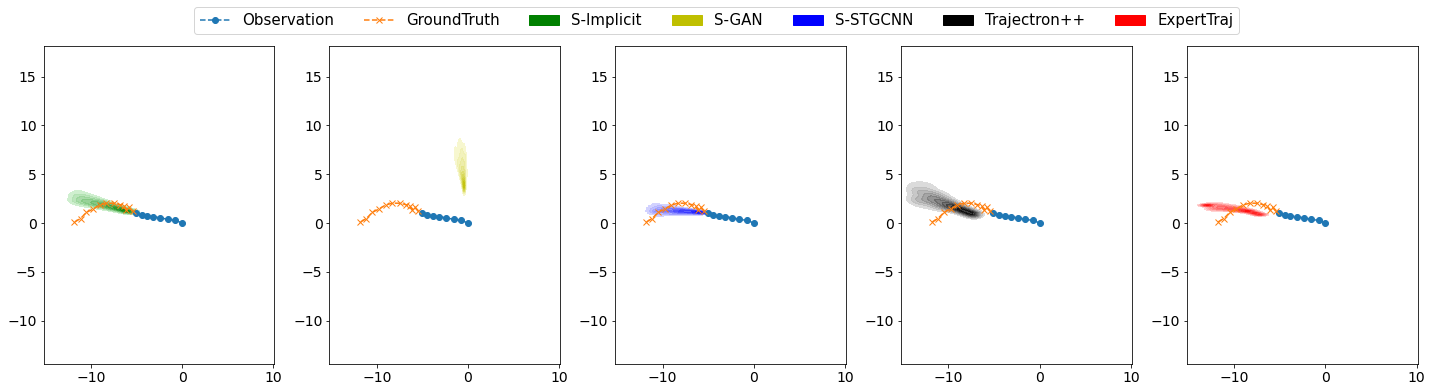

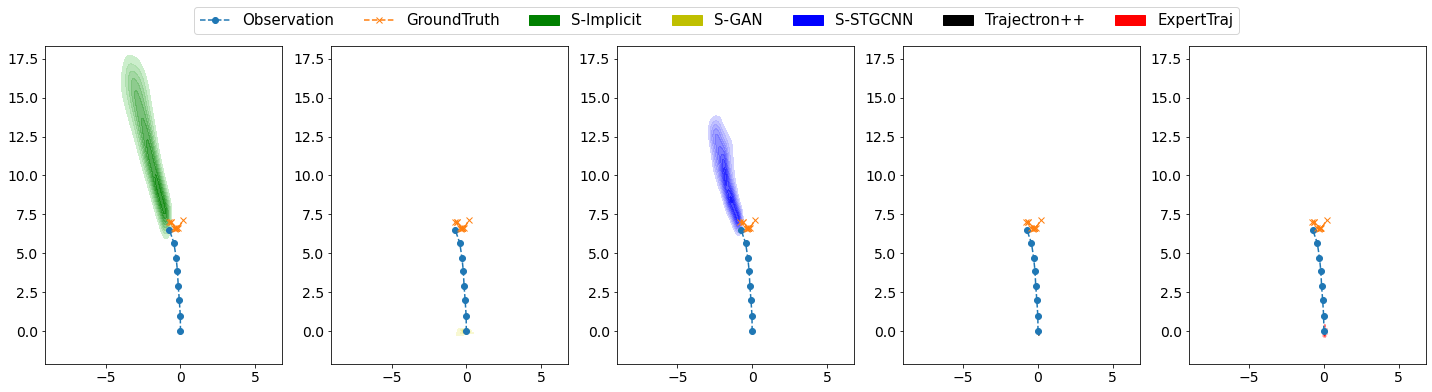

In [5]:
cmap = ['g', 'y', 'b', 'k', 'r']

indices = {}
#Paper indices
indices['eth'] = [0,95]
indices['hotel'] = [419,701]
indices['zara1'] = [2031,315,1290]
# indices['eth'] = [
#     0, 14, 21, 24, 33, 44, 45, 50, 58, 60, 79, 92, 93, 95, 105, 106, 112, 113,
#     121, 113, 121, 122, 127, 140, 153, 159, 164, 166, 167, 170, 172, 177
# ]
# indices['hotel'] = [
#     30, 87, 173, 189, 196, 198, 221, 329, 364, 419, 501, 510, 528, 560, 572,
#     620, 701, 719, 733, 818, 850, 861, 870, 965, 1007, 1008, 1013, 1031, 1046,
#     1052
# ]
# indices['zara1'] = [
#     25, 38, 130, 240, 315, 347, 461, 648, 679, 687, 693, 720, 781, 858, 947,
#     1004, 1053, 1091, 1130, 1178, 1290, 1320, 1359, 1691, 1702, 1884, 1927,
#     2031, 2186, 2220
# ]

for key in indices[dset]:
    fig, ax = plt.subplots(1, 5, figsize=(20, 5))  #,sharex=True, sharey=True)

    # Deyao: i notice that for the selected examples, eth and zara1 are better visualized when we switch x and y axis
    if dset in ['eth', 'zara1']:
        for model in data[key].keys():
            data[key][model] = np.flip(data[key][model], axis=-2)

    for i in range(5):
        if i == 0:
            ax[i].plot(data[key]['Observation'][0],
                       data[key]['Observation'][1],
                       '--o',
                       label='Observation')
            ax[i].plot(data[key]['GroundTruth'][0],
                       data[key]['GroundTruth'][1],
                       '--x',
                       label='GroundTruth')
        else:
            ax[i].plot(data[key]['Observation'][0],
                       data[key]['Observation'][1], '--o')
            ax[i].plot(data[key]['GroundTruth'][0],
                       data[key]['GroundTruth'][1], '--x')

    x_limit, y_limit = obtain_limits(data[key])

    sns.kdeplot(data[key]['S-Implicit'][:, 0].reshape(-1),
                data[key]['S-Implicit'][:, 1].reshape(-1),
                shade=True,
                shade_lowest=False,
                color=cmap[0],
                alpha=0.8,
                label='S-Implicit',
                ax=ax[0])

    sns.kdeplot(data[key]['S-GAN'][:, 1].reshape(-1),
                data[key]['S-GAN'][:, 0].reshape(-1),
                shade=True,
                shade_lowest=False,
                color=cmap[1],
                alpha=0.8,
                label='S-GAN',
                ax=ax[1])
    sns.kdeplot(data[key]['S-STGCNN'][:, 0].reshape(-1),
                data[key]['S-STGCNN'][:, 1].reshape(-1),
                shade=True,
                shade_lowest=False,
                color=cmap[2],
                alpha=0.8,
                label='S-STGCNN',
                ax=ax[2])
    sns.kdeplot(data[key]['Trajectron++'][:, 0].reshape(-1),
                data[key]['Trajectron++'][:, 1].reshape(-1),
                shade=True,
                shade_lowest=False,
                color=cmap[3],
                alpha=0.8,
                label='Trajectron++',
                ax=ax[3])
    sns.kdeplot(data[key]['ExpertTraj'][:, 0].reshape(-1),
                data[key]['ExpertTraj'][:, 1].reshape(-1),
                shade=True,
                shade_lowest=False,
                color=cmap[4],
                alpha=0.8,
                label='ExpertTraj',
                ax=ax[4])

    for i in range(5):
        ax[i].xaxis.set_tick_params(labelsize=14)
        ax[i].yaxis.set_tick_params(labelsize=14)
        ax[i].set_xlim(x_limit)  # deyao: Here the limit changed
        ax[i].set_ylim(y_limit)

    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines,
               labels,
               loc="upper center",
               ncol=7,
               fontsize=15,
               bbox_to_anchor=(0.5, 1.1))
    plt.tight_layout()
    plt.savefig(output_dir+ '/case_' + dset + '_' + str(key) + '.png',
            dpi=300,
            bbox_inches='tight')
    plt.show()